In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("restaurent_bill.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
data.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
data.shape

(244, 7)

In [11]:
display(data.drop_duplicates())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Visualizing Outliers Using Box Plot

C:\Users\vanam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

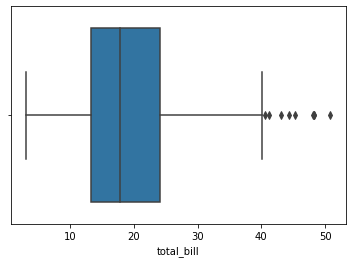

In [12]:
# Box Plot
import seaborn as sns
sns.boxplot(data['total_bill'])

In [13]:
# Position of the Outlier
import numpy as np
print(np.where(data['total_bill']>40))

(array([ 59,  95, 102, 142, 156, 170, 182, 184, 197, 212], dtype=int64),)


# Z-score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [16]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data['total_bill']))
print(z)

0      0.314711
1      1.063235
2      0.137780
3      0.438315
4      0.540745
         ...   
239    1.040511
240    0.832275
241    0.324630
242    0.221287
243    0.113229
Name: total_bill, Length: 244, dtype: float64


# IQR (Inter Quartile Range) 
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR


In [17]:
# IQR
# Calculate the upper and lower limits
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("IQR : ",IQR)
print("Lower Limit : ",lower)
print("Upper Limit : ",upper)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['total_bill']>=upper)[0]
lower_array = np.where(data['total_bill']<=lower)[0]

# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)

IQR :  10.779999999999998
Lower Limit :  -2.8224999999999945
Upper Limit :  40.29749999999999
New Shape:  (235, 7)


In [18]:
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[235 rows x 7 columns]
